In [152]:
%matplotlib inline
 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import seaborn as sns
import time
from requests import get
import json
import datetime
 
from matplotlib import rcParams
rcParams['figure.figsize'] = (12, 6)
rcParams['figure.dpi'] = 150
rcParams['font.size'] = 16
rcParams['font.family'] = 'sans-serif'
rcParams['axes.facecolor'] = '#ffffff'
rcParams['lines.linewidth'] = 2.0



In [1]:
pwd

'C:\\Users\\khali'

In [153]:
file_0 = pd.read_csv('C:/KhalidH/ig_data_.csv', index_col=None)
file_1 = pd.read_csv('C:/KhalidH/NG/NG_data1.csv', index_col=None)
file_2 = pd.read_csv('C:/KhalidH/NG_data_.csv', index_col=None)


frames = [file_0]
data =  pd.concat(frames)
# latitude, longitude,bedroom_number,property_type
data = data.drop_duplicates(subset=['property_type' ,'latitude', 'longitude','post_code','bedroom_number','price'])
#data.to_csv("C:/KhalidH/NG/NG1_master.csv",index=False, encoding='utf-8', mode='w', header=True)
#https://www.ritchieng.com/machine-learning-project-boston-home-prices/
len(data)

2997

In [154]:
#values = 'Town house','End terrace house', 'Maisonette', 'Studio', 'Detached house','Detached bungalow', 'Bungalow', 'Semi-detached bungalow','Terraced bungalow'
data = data.loc[data['property_type'].isin(['Semi-detached house', 'Flat', 'Terraced house','Town house','End terrace house', 'Maisonette', 'Studio', 'Detached house','Detached bungalow', 'Bungalow', 'Semi-detached bungalow','Terraced bungalow'])]

data = data[(data['price'] != 0)]
data['property_type'].unique()

array(['Semi-detached house', 'Terraced house', 'Bungalow',
       'End terrace house', 'Flat', 'Detached house', 'Town house',
       'Maisonette', 'Studio', 'Semi-detached bungalow',
       'Detached bungalow'], dtype=object)

In [155]:
data['todays_date'] = pd.to_datetime(datetime.datetime.today().strftime('%Y-%m-%d'))
data['A'] = pd.to_datetime(data['todays_date']).dt.date
data['B'] = pd.to_datetime(data['first_published_date']).dt.date
data['updated_in_days'] = (data['A'] - data['B']).dt.days

rent = data[data['listing_status'] == 'rent']
sale = data[data['listing_status'] == 'sale']
rent['weekly_price'] = rent['price']
rent['price'] = rent['weekly_price'] * 52 / 12 # monthly rent

          
#rent.apply(lambda row: row['weekly_price'] * 52 /12, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [156]:
(data[(data['B'] == data['A']) & (data['property_type'] == 'Flat') & (data['listing_status'] == 'rent')])

,Unnamed: 0,county,displayable_address,property_type,street_name,price,listing_id,bathroom_number,bedroom_number,latitude,...,first_published_date,last_published_date,price_change,num_floors,num_recepts,new_home,todays_date,A,B,updated_in_days
1463,93,Essex,"Medici Close, Ilford IG3",Flat,Tuscany house Medici close,219,44517940,0,1,51.573740,...,2019-01-12 02:43:22,2019-01-12 02:43:22,"[{'direction': '', 'date': '2019-01-12 01:05:0...",0,0,NaN,2019-01-12,2019-01-12,2019-01-12,0
2940,44,London,"Hatherley Road, Walthamstow, London E17",Flat,Hatherley Road,415,50149709,1,2,51.586155,...,2019-01-12 10:10:58,2019-01-12 10:13:51,"[{'direction': '', 'date': '2019-01-12 10:07:2...",0,1,NaN,2019-01-12,2019-01-12,2019-01-12,0
3117,21,London,"Amber Avenue, London E17",Flat,Amber Avenue,300,50149812,0,2,51.600370,...,2019-01-12 10:36:20,2019-01-12 10:38:24,"[{'direction': '', 'date': '2019-01-12 10:33:1...",0,1,NaN,2019-01-12,2019-01-12,2019-01-12,0
3247,51,London,"Forest Road, Walthamstow E17",Flat,Forest Road,231,45660206,1,1,51.587080,...,2019-01-12 01:23:00,2019-01-12 01:23:00,"[{'direction': '', 'date': '2019-01-12 01:20:1...",0,1,NaN,2019-01-12,2019-01-12,2019-01-12,0


In [157]:

#data.drop_duplicates(subset=None, keep='first', inplace=False)
data['post_code'].unique()



array(['IG1', 'IG2', 'IG3', 'IG4', 'IG5', 'IG6', 'E17'], dtype=object)

In [158]:
#Block = sale[sale['property_type'] == 'Block of flats'] 
#Block[['first_published_date','last_published_date','street_name','bedroom_number','price','agent_name','post_code']].dropna()

data.columns


Index(['Unnamed: 0', 'county', 'displayable_address', 'property_type',
       'street_name', 'price', 'listing_id', 'bathroom_number',
       'bedroom_number', 'latitude', 'longitude', 'listing_status',
       'post_code', 'first_published_date', 'last_published_date',
       'price_change', 'num_floors', 'num_recepts', 'new_home', 'todays_date',
       'A', 'B', 'updated_in_days'],
      dtype='object')

In [159]:
def missig_data(data_frame):

    data = data_frame
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data


                                   

In [160]:
#sale = sale[~sale['title'].str.contains('DN')]
#rent = rent[~rent['title'].str.contains('DN')]

print('rent missing data')
print(missig_data(rent).head(10))
print('\nsale missing data')
print(missig_data(sale).head(10))


rent missing data
                     Total   Percent
new_home              1246  1.000000
street_name             33  0.026485
county                  14  0.011236
price_change             8  0.006421
weekly_price             0  0.000000
longitude                0  0.000000
displayable_address      0  0.000000
property_type            0  0.000000
price                    0  0.000000
listing_id               0  0.000000

sale missing data
                     Total   Percent
new_home              1598  1.000000
county                  33  0.020651
price_change            23  0.014393
street_name              1  0.000626
updated_in_days          0  0.000000
latitude                 0  0.000000
displayable_address      0  0.000000
property_type            0  0.000000
price                    0  0.000000
listing_id               0  0.000000


Text(0.5, 1.0, 'Properties for rent')

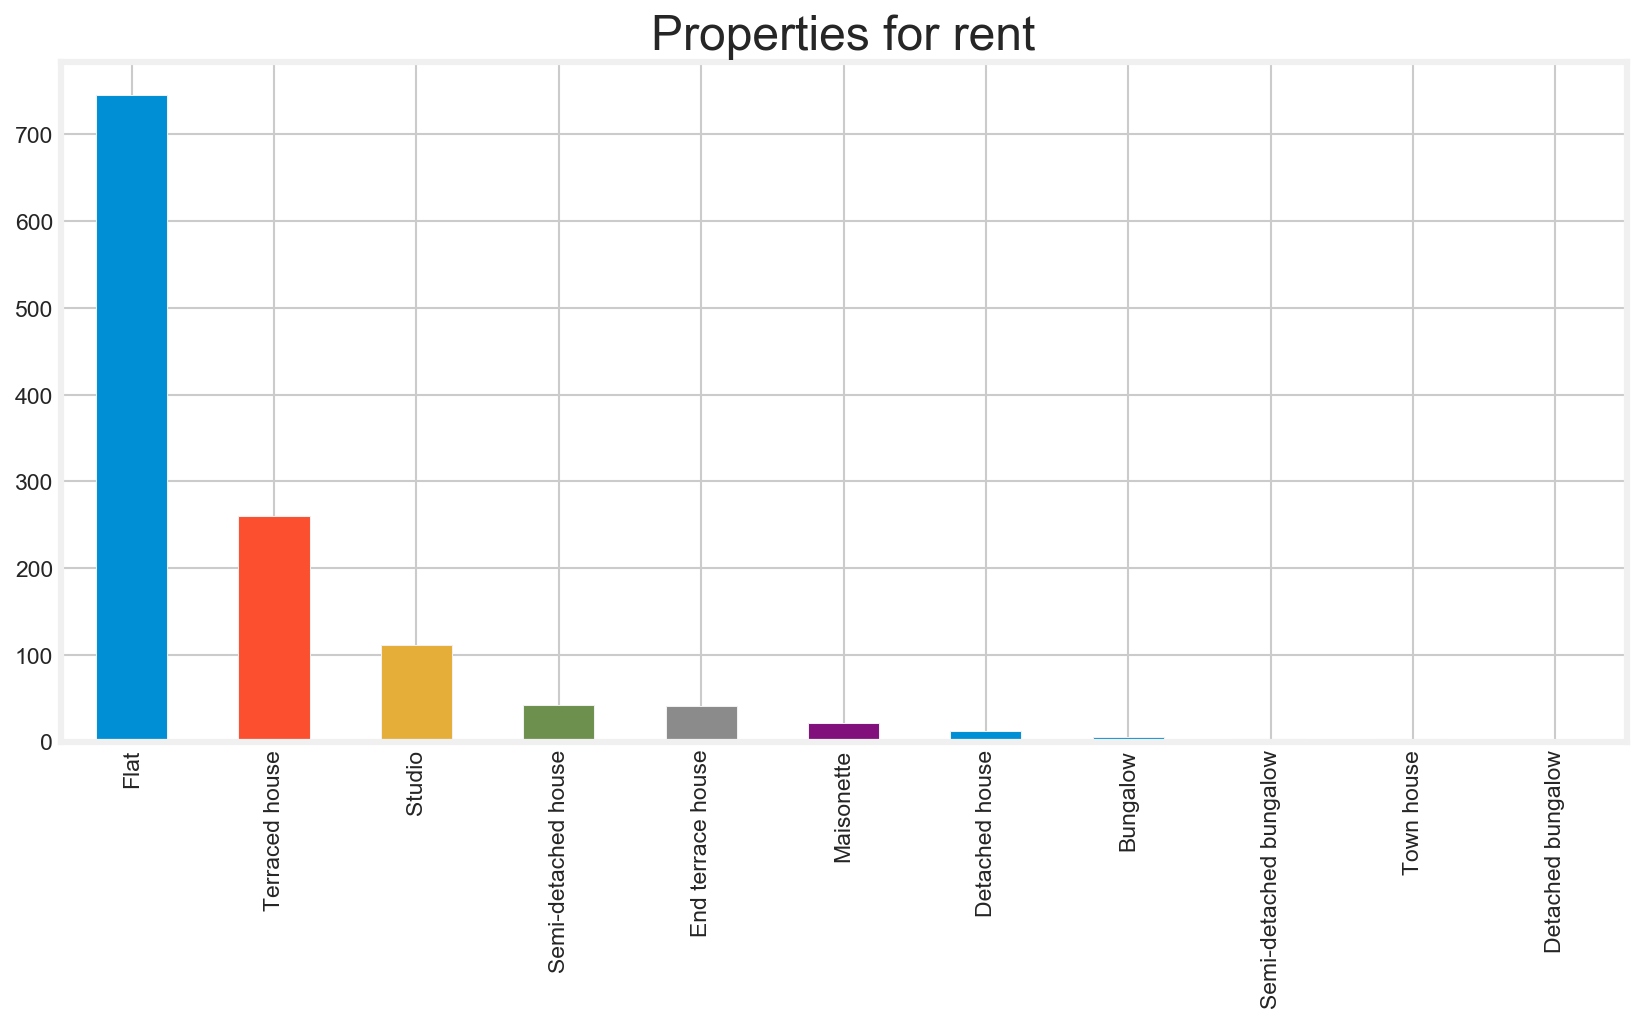

In [161]:
ax = rent["property_type"].value_counts().plot(x='property_type', kind='bar')
ax.set_title("Properties for rent")

Text(0.5, 1.0, 'Properties for sale')

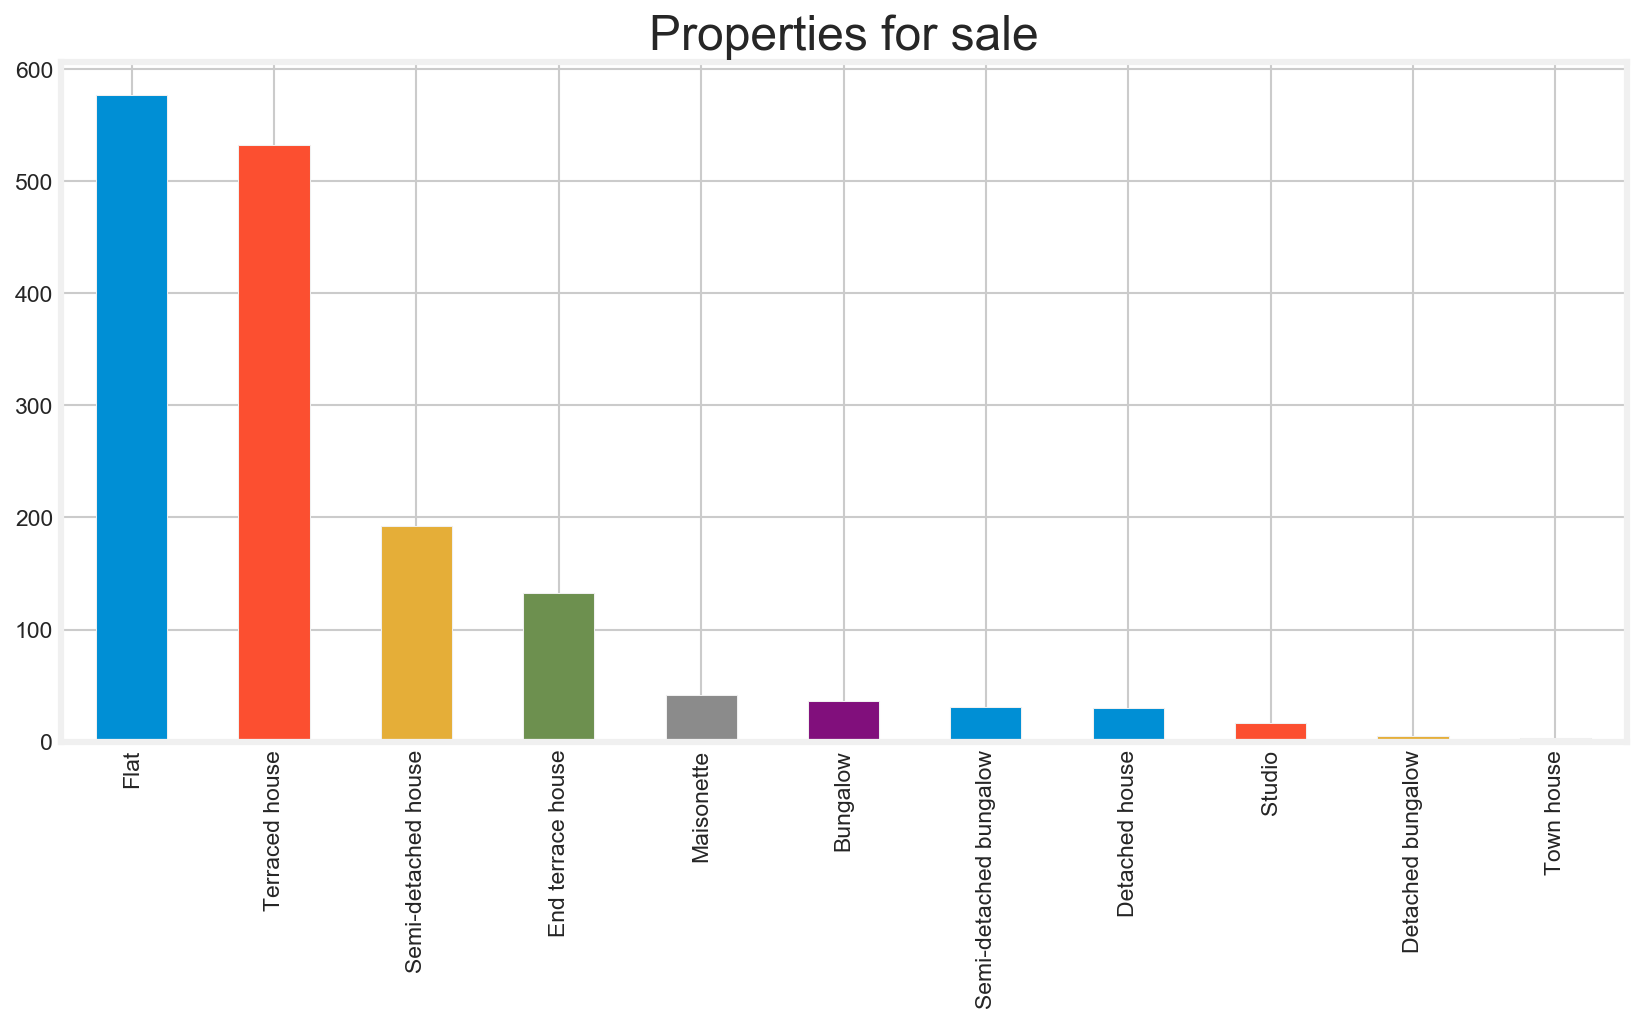

In [162]:
ax = sale["property_type"].value_counts().plot(x='property_type', kind='bar')
ax.set_title("Properties for sale")

Text(0.5, 1.0, 'Rent price by postcode')

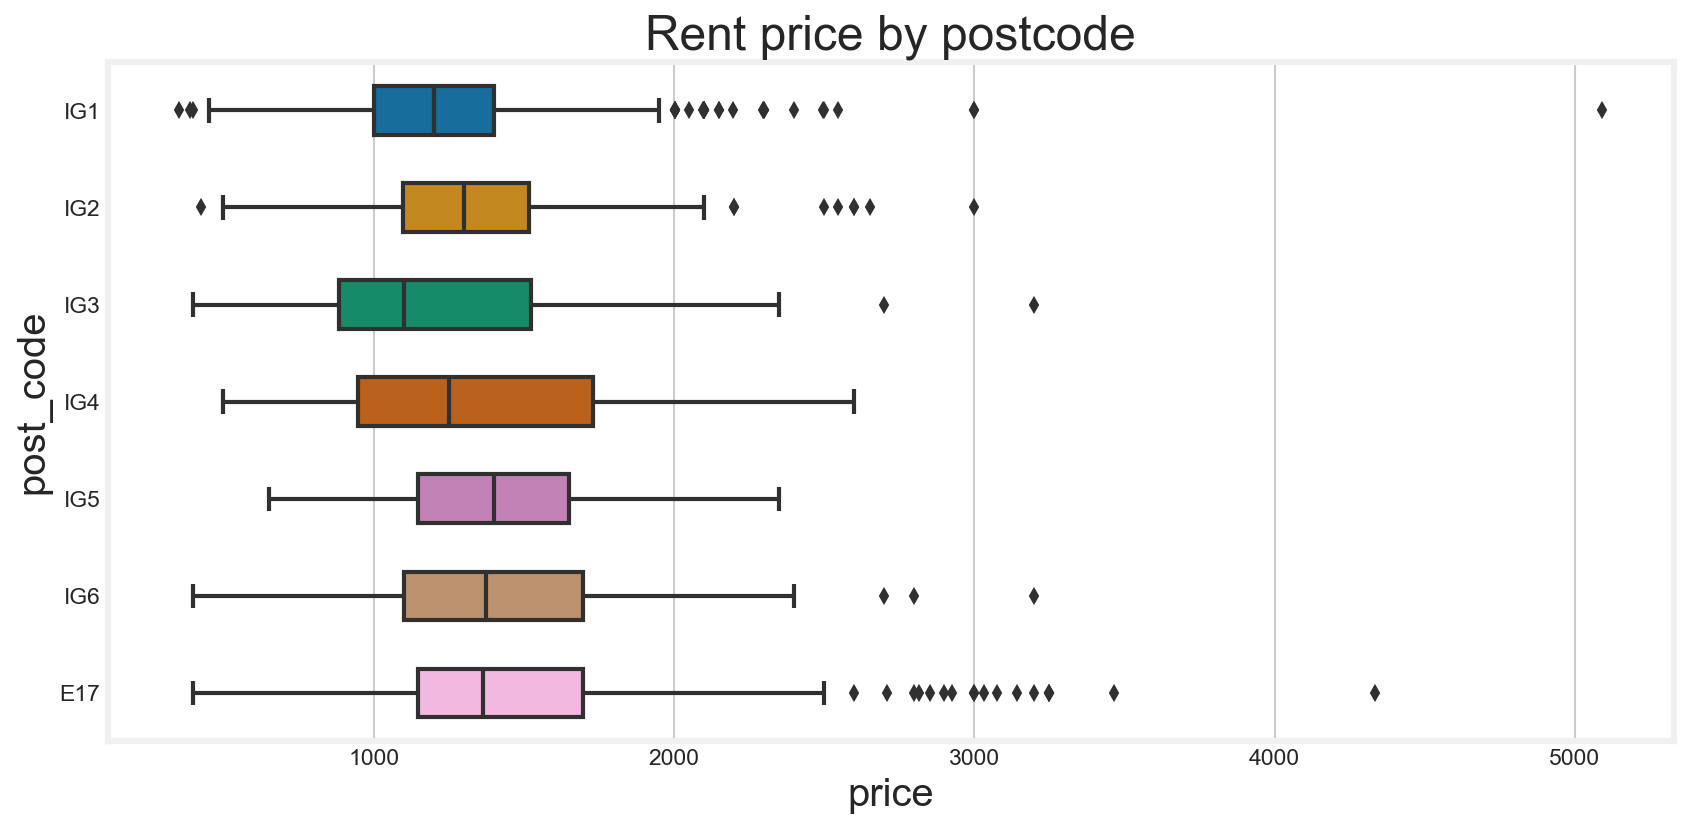

In [163]:
bplot=sns.boxplot(y='post_code', x='price', 
                 data=rent, 
                 width=0.5,
                 palette="colorblind")
bplot.set_title("Rent price by postcode")

Text(0.5, 1.0, 'Sale price by postcode')

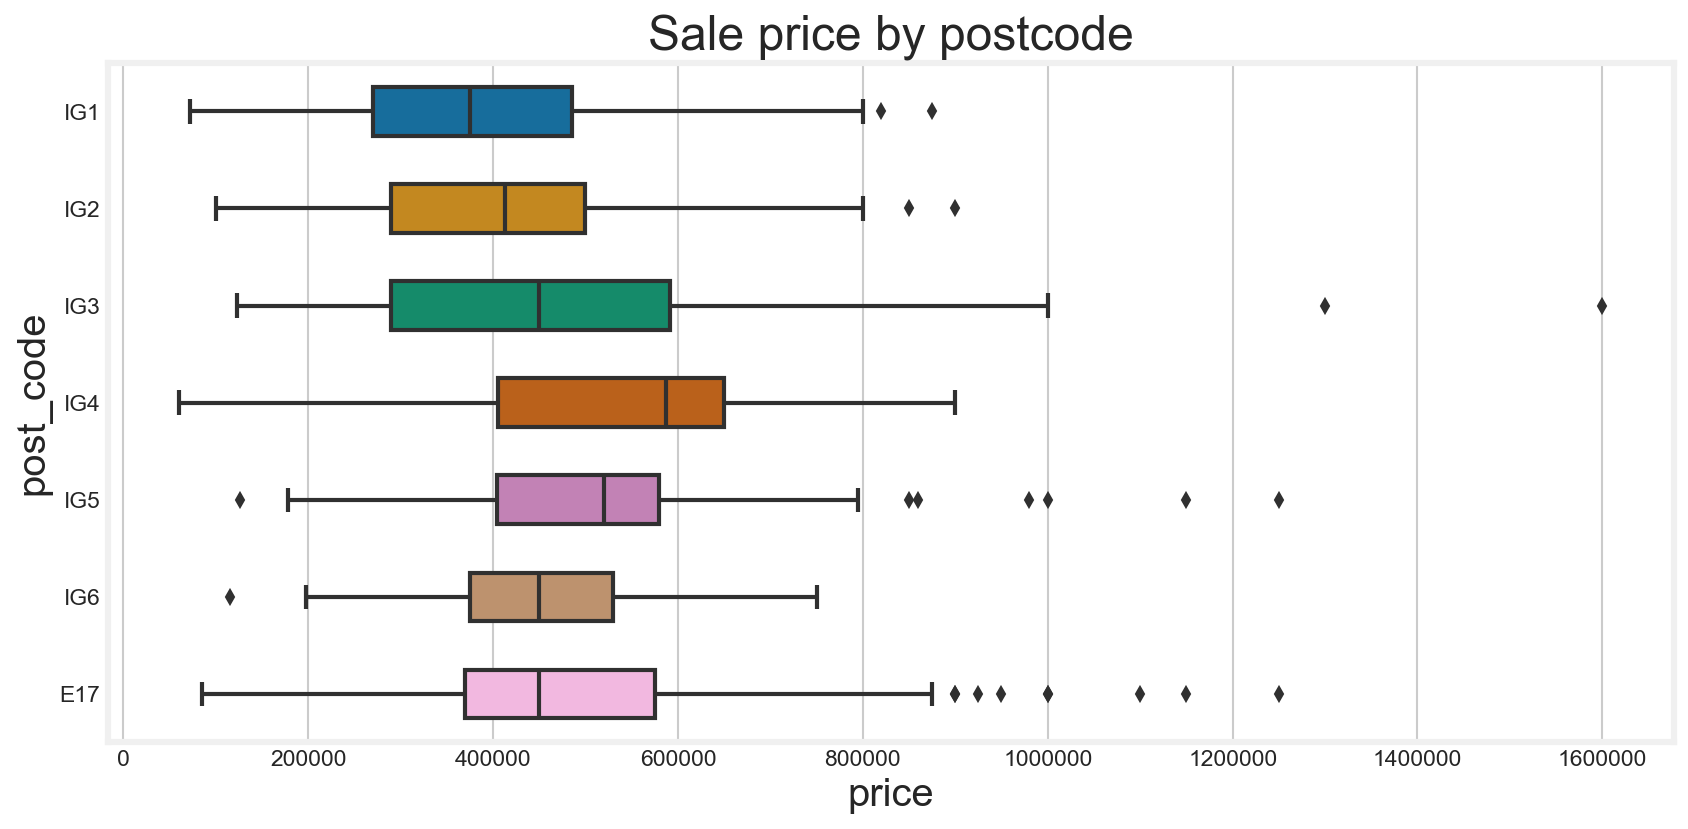

In [164]:
bplot=sns.boxplot(y='post_code', x='price', 
                 data=sale, 
                 width=0.5,
                 palette="colorblind")
bplot.set_title("Sale price by postcode")

In [165]:
#sale = sale[~sale['post_code'].str.contains('DN')]
rent.dropna()
rent_house = rent[rent['property_type'].str.contains('house',case=False,na=False)]
rent_flat = rent[(rent.property_type == 'Flat')]
#rent_house['price'].dropna()
sale_house = sale[sale['property_type'].str.contains('house',case=False,na=False)]
sale_flat = sale[(sale.property_type == 'Flat')]




C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


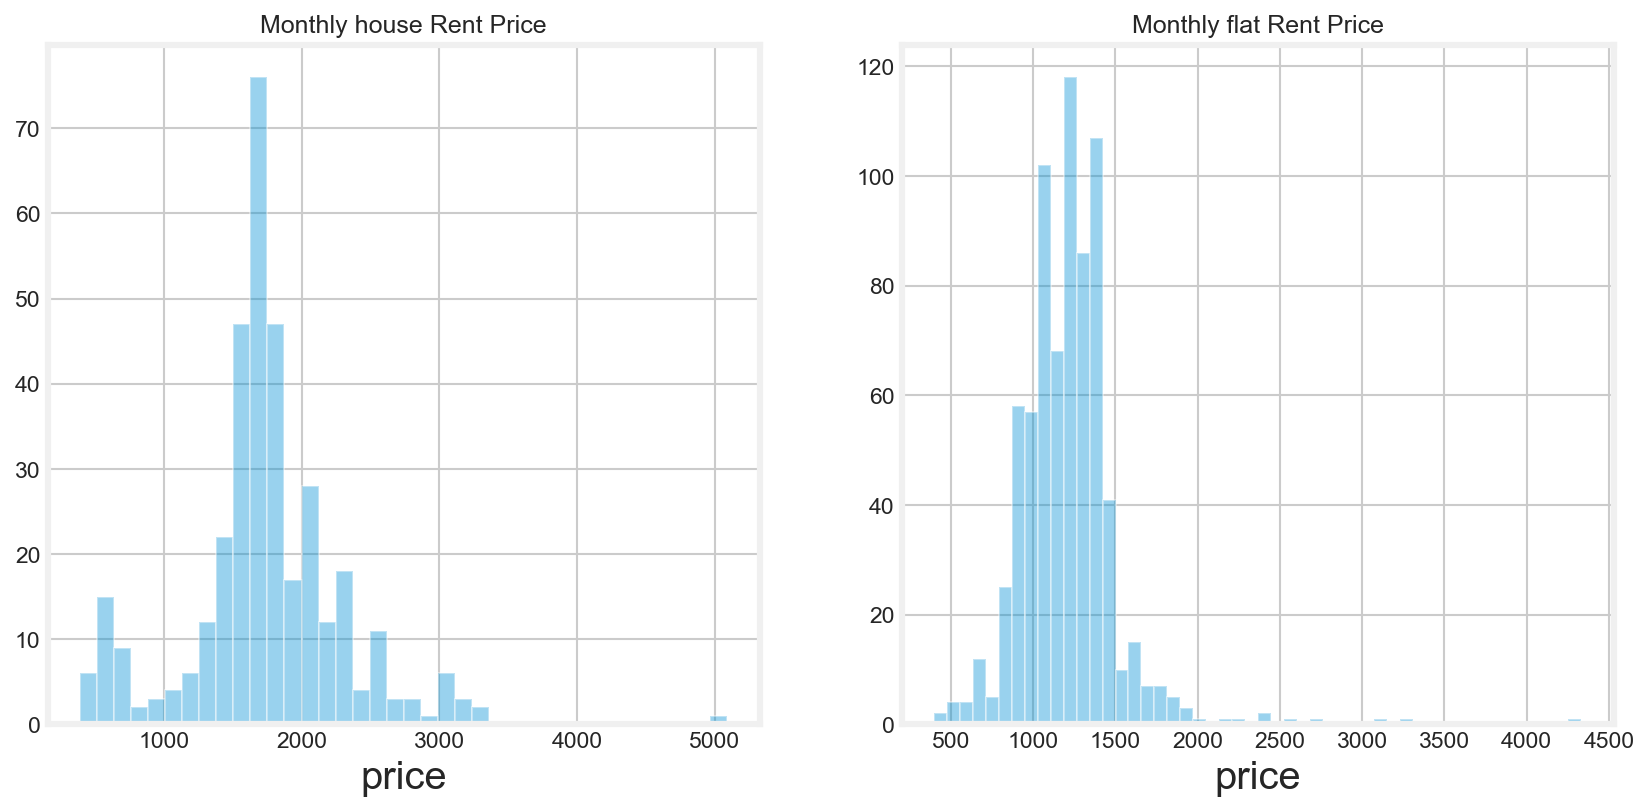

In [166]:
fig, ax =plt.subplots(1,2)
sns.set(rc={'figure.figsize':(21.7,8.27)})
ax[0].set_title("Monthly house Rent Price")
ax[1].set_title("Monthly flat Rent Price")

sns.distplot(rent_house['price'].dropna(),hist=True,kde=False,norm_hist=False,ax=ax[0])
sns.distplot(rent_flat['price'].dropna(),hist=True,kde=False,norm_hist=False,ax=ax[1])

#fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


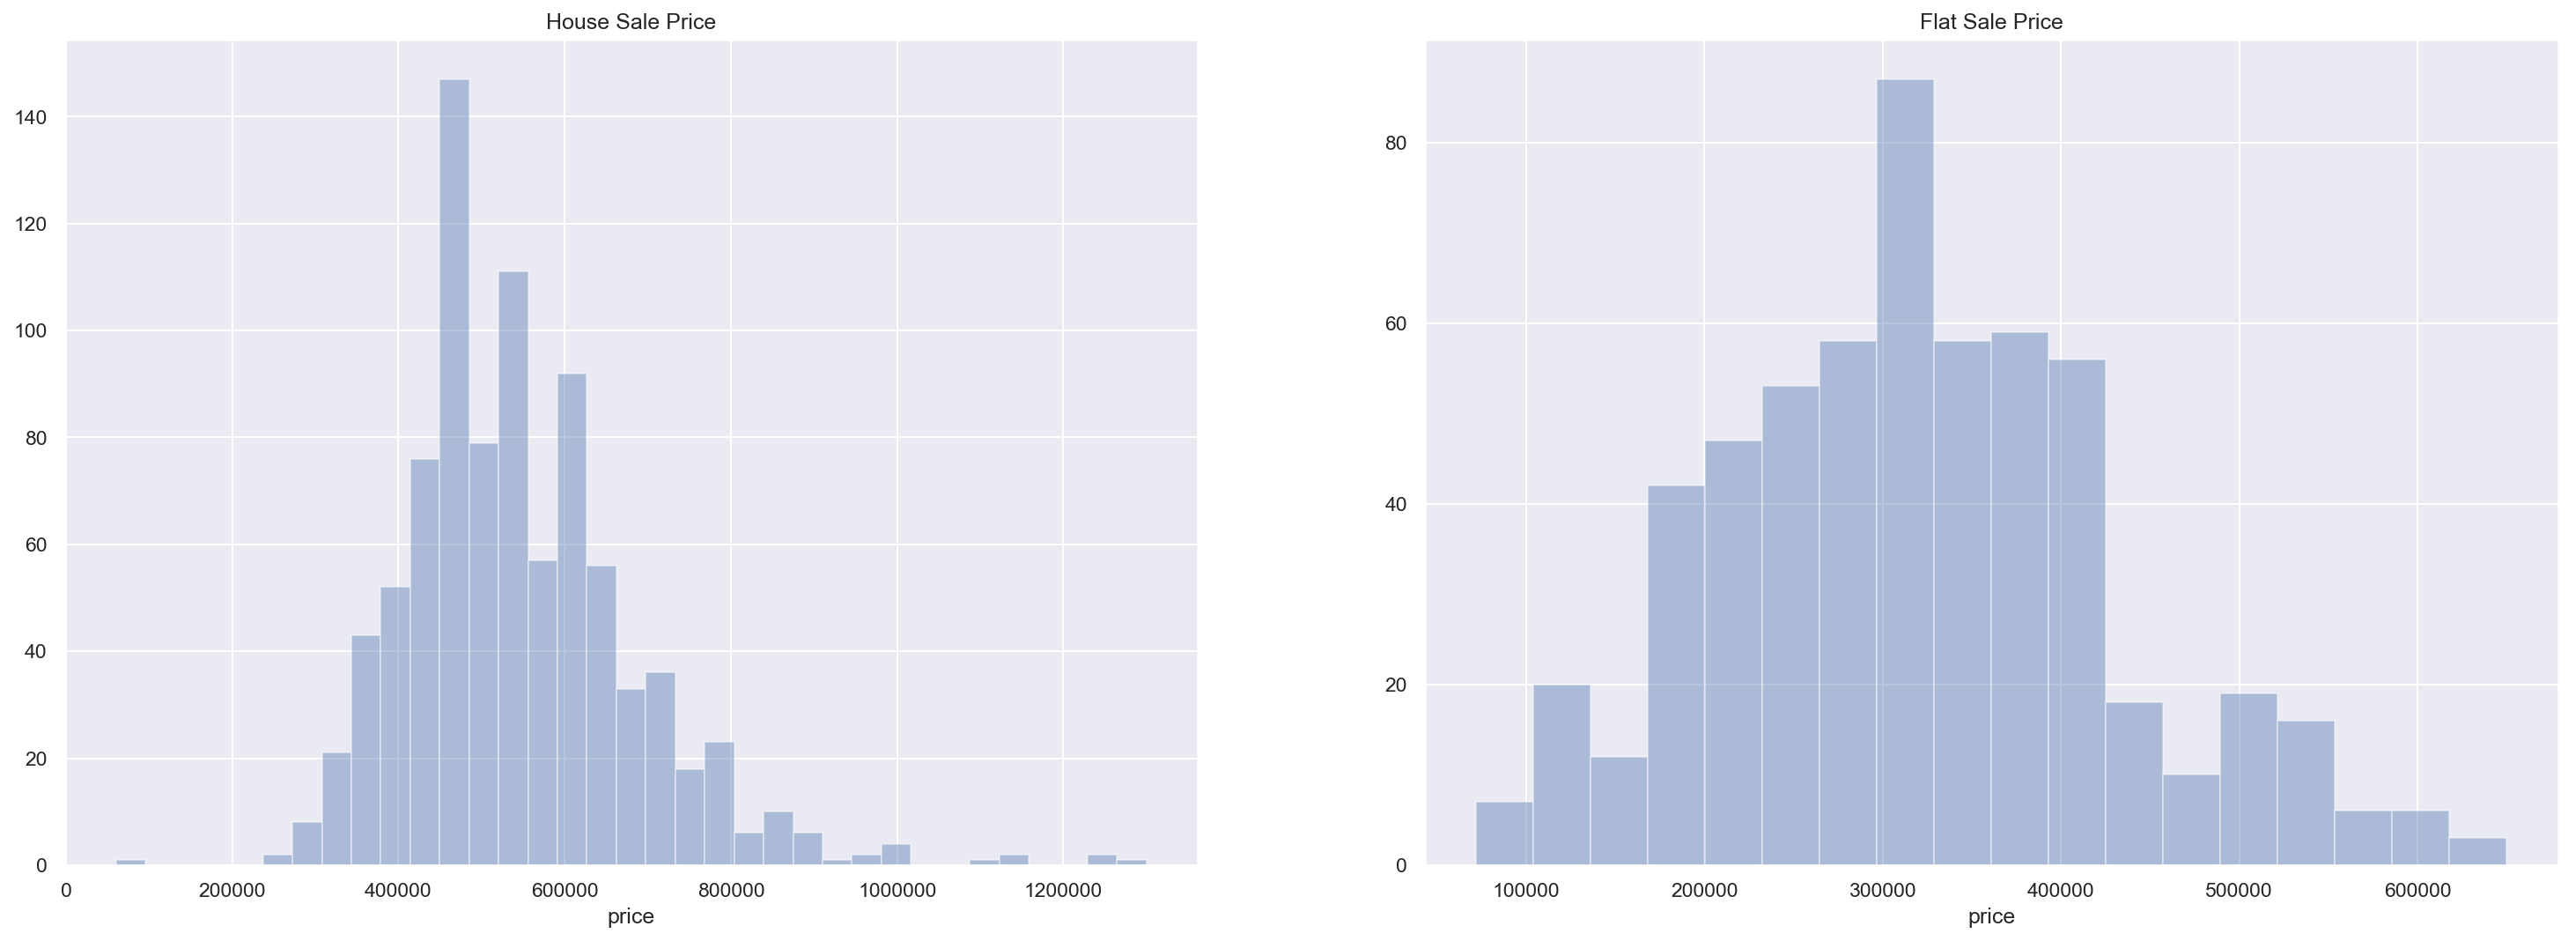

In [167]:
fig, ax =plt.subplots(1,2)
sns.set(rc={'figure.figsize':(21.7,8.27)})
ax[0].set_title("House Sale Price")
ax[1].set_title("Flat Sale Price")
sns.distplot(sale_house['price'].astype(float).dropna(),hist=True,kde=False,norm_hist=False,ax=ax[0])
sns.distplot(sale_flat['price'].astype(float).dropna(),hist=True,kde=False,norm_hist=False,ax=ax[1])

fig.show()

In [168]:
print('Rented property stats for number of days the property has been on the market \n')
market = rent.groupby(['property_type','post_code'])['updated_in_days'].describe().dropna().reset_index()
market[market['count'] > 5]

Rented property stats for number of days the property has been on the market 



,property_type,post_code,count,mean,std,min,25%,50%,75%,max
6,End terrace house,E17,7.0,72.857143,118.933355,2.0,8.50,35.0,59.50,337.0
7,End terrace house,IG1,11.0,131.272727,129.482115,3.0,7.50,99.0,188.50,355.0
8,End terrace house,IG2,6.0,166.500000,158.579633,10.0,51.25,114.0,275.75,401.0
11,End terrace house,IG6,9.0,39.777778,57.705671,3.0,8.00,8.0,45.00,182.0
12,Flat,E17,238.0,73.630252,144.063181,0.0,8.00,33.0,65.75,1319.0
13,Flat,IG1,271.0,176.608856,212.828383,1.0,39.50,85.0,250.00,1152.0
14,Flat,IG2,97.0,150.814433,219.948779,1.0,22.00,60.0,166.00,1059.0
15,Flat,IG3,81.0,296.567901,391.971043,0.0,40.00,108.0,410.00,2090.0
16,Flat,IG4,15.0,222.666667,408.690534,5.0,41.50,80.0,251.00,1646.0
17,Flat,IG5,11.0,149.909091,246.026200,2.0,19.00,51.0,173.00,835.0


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


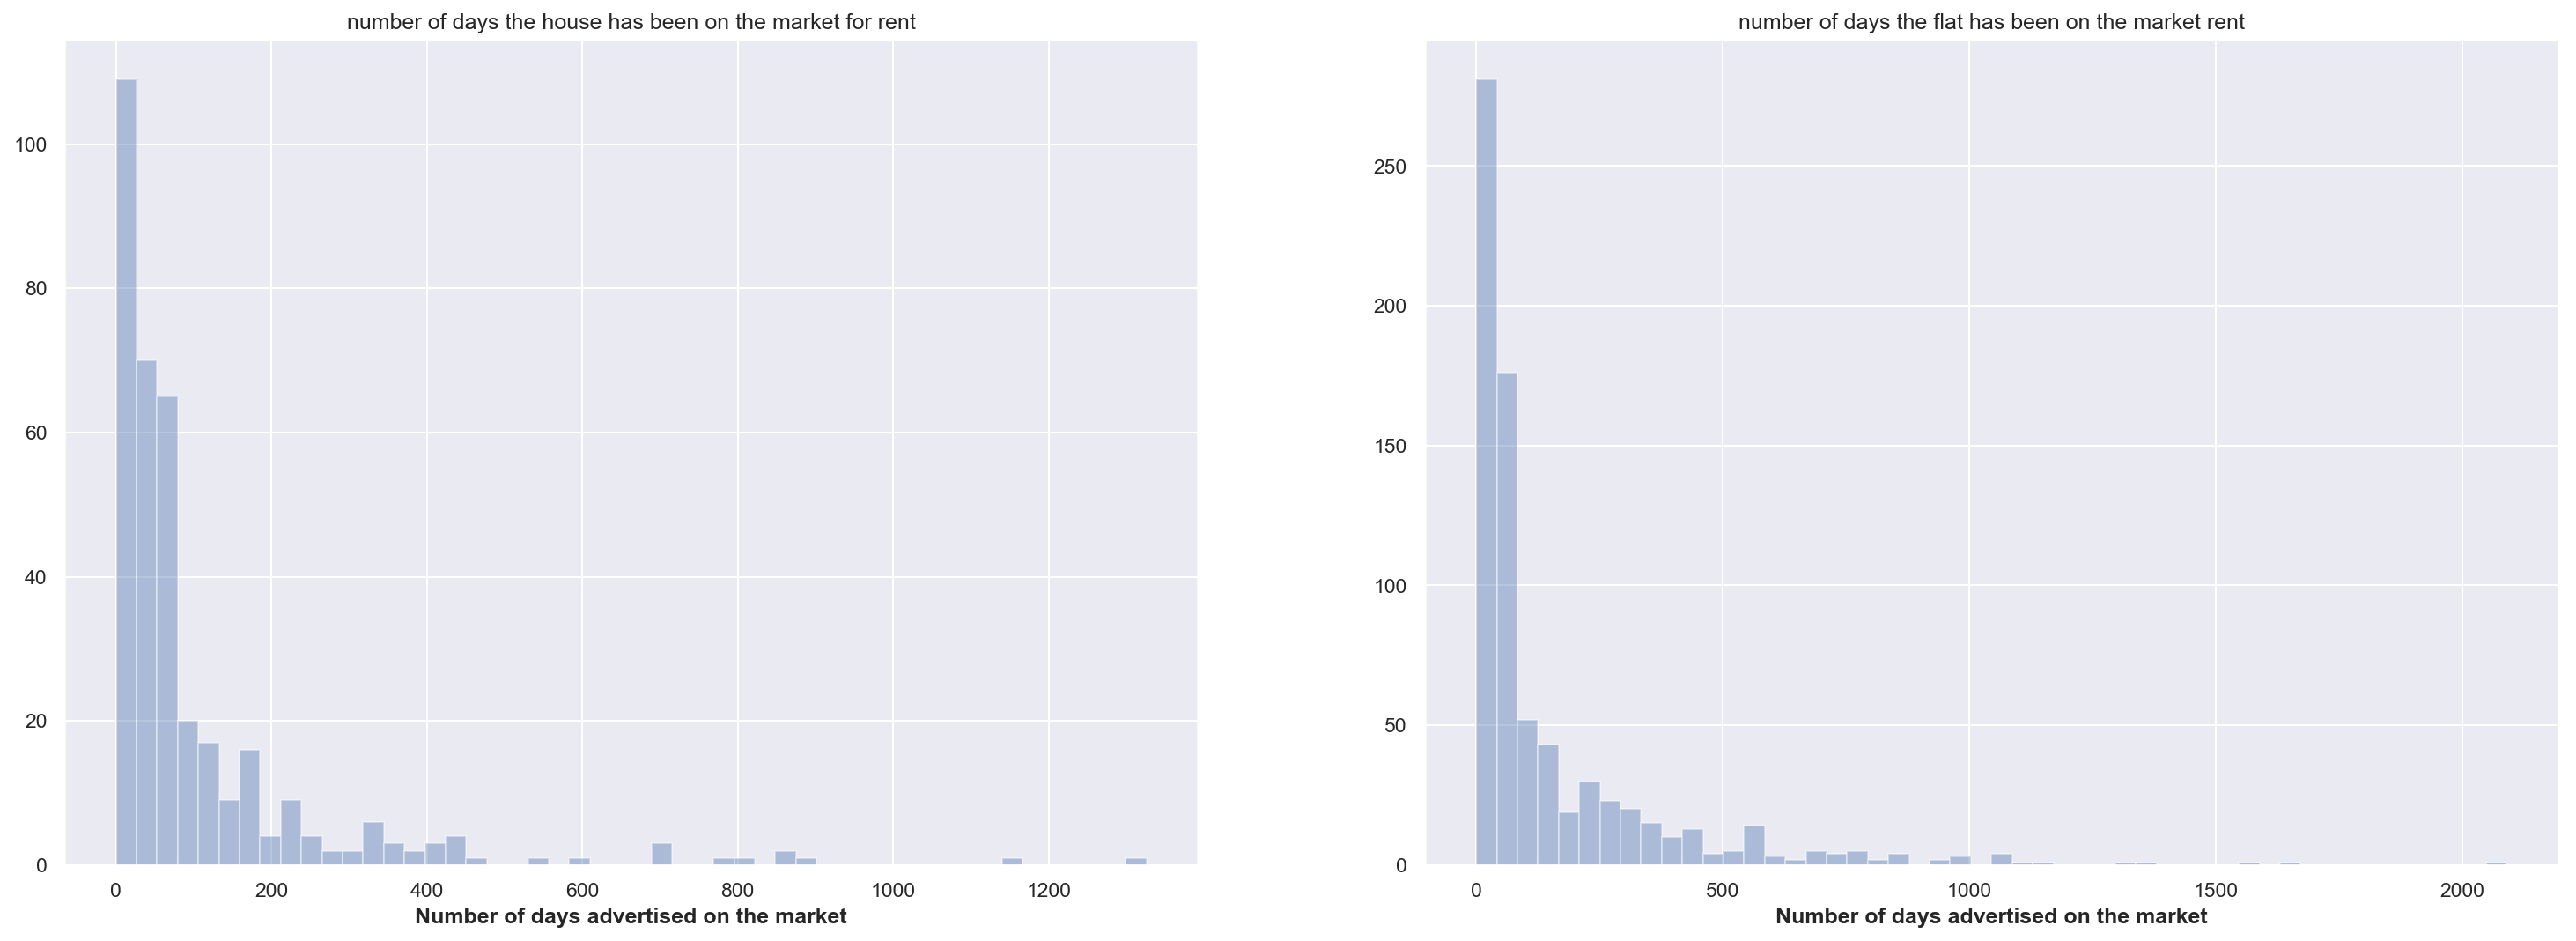

In [169]:
fig, ax =plt.subplots(1,2)
sns.set(rc={'figure.figsize':(21.7,8.27)})

ax[0].set_title("number of days the house has been on the market for rent")
ax[1].set_title("number of days the flat has been on the market rent")

#ax[1].set_xlabel(xlabel ='Number of Days', fontweight='bold')
sns.distplot(rent_house['updated_in_days'],hist=True,kde=False,norm_hist=False,ax=ax[0])
ax[0].set_xlabel(xlabel='Number of days advertised on the market', fontweight='bold')
sns.distplot(rent_flat['updated_in_days'],hist=True,kde=False,norm_hist=False,ax=ax[1])
ax[1].set_xlabel(xlabel='Number of days advertised on the market', fontweight='bold')
fig.show()



updated_in_days is number of days advertised on the market (data extracted on 30-Dec-2018)

In [170]:
print(rent_house['price'].describe())

rent_house['updated_in_days'].describe()

count     358.000000
mean     1746.793296
std       558.424926
min       390.000000
25%      1551.333333
50%      1746.333333
75%      2002.000000
max      5091.666667
Name: price, dtype: float64


count     358.000000
mean      106.315642
std       169.664567
min         0.000000
25%        15.250000
50%        53.500000
75%       109.000000
max      1326.000000
Name: updated_in_days, dtype: float64

Updated_in_days is number of days advertised on the market (data extracted on 30-Dec-2018)

In [171]:
print(rent_flat['price'].describe())

rent_flat['updated_in_days'].describe()

count     746.000000
mean     1214.605451
std       300.421999
min       398.666667
25%      1048.666667
50%      1200.333333
75%      1352.000000
max      4333.333333
Name: price, dtype: float64


count     746.000000
mean      153.300268
std       237.615941
min         0.000000
25%        22.000000
50%        59.000000
75%       185.250000
max      2090.000000
Name: updated_in_days, dtype: float64

In [172]:
rented = rent[['property_type','bedroom_number','price','post_code']]
rented = pd.DataFrame(rented.groupby(['property_type','bedroom_number','post_code'])['price'].agg(['median','mean','count']).reset_index())
rented = rented.rename(index=str, columns={"median": "median_rent","mean": "mean_rent","count": "count_rent" })


In [173]:
print('\n Top 15 median rent and count > 20 number of properties on rent')
rented[rented['count_rent'] > 20].sort_values(by=['median_rent'], ascending=False).head(15)


 Top 15 median rent and count > 20 number of properties on rent


,property_type,bedroom_number,post_code,median_rent,mean_rent,count_rent
122,Terraced house,3,E17,1798.333333,1875.714286,28
123,Terraced house,3,IG1,1651.000000,1651.464286,28
49,Flat,2,E17,1399.666667,1457.906667,100
51,Flat,2,IG2,1300.000000,1296.027778,48
50,Flat,2,IG1,1248.000000,1260.965333,125
52,Flat,2,IG3,1248.000000,1249.045977,29
42,Flat,1,E17,1148.333333,1171.754821,121
44,Flat,1,IG2,1100.666667,1123.341085,43
43,Flat,1,IG1,1001.000000,1024.263158,133
45,Flat,1,IG3,949.000000,922.614815,45


In [174]:
print('\n Bottom 15 median rent and count > 20 number of properties on rent')
rented[rented['count_rent'] > 20].sort_values(by=['median_rent'], ascending=False).tail(15)


 Bottom 15 median rent and count > 20 number of properties on rent


,property_type,bedroom_number,post_code,median_rent,mean_rent,count_rent
122,Terraced house,3,E17,1798.333333,1875.714286,28
123,Terraced house,3,IG1,1651.000000,1651.464286,28
49,Flat,2,E17,1399.666667,1457.906667,100
51,Flat,2,IG2,1300.000000,1296.027778,48
50,Flat,2,IG1,1248.000000,1260.965333,125
52,Flat,2,IG3,1248.000000,1249.045977,29
42,Flat,1,E17,1148.333333,1171.754821,121
44,Flat,1,IG2,1100.666667,1123.341085,43
43,Flat,1,IG1,1001.000000,1024.263158,133
45,Flat,1,IG3,949.000000,922.614815,45


In [175]:
on_sale = sale[['property_type','bedroom_number','price','post_code']]
on_sale = sale[['price']].astype(float)
on_sale = pd.DataFrame(sale.groupby(['property_type','bedroom_number','post_code'])['price'].agg(['median','mean','count']).reset_index())
on_sale = on_sale.rename(index=str, columns={"median": "median_sale","mean": "mean_sale","count": "count_sale" })


In [176]:
#Gross Yield = Annual Rent / Property Value
result = pd.merge(rented, on_sale,  how='right', left_on=['property_type','bedroom_number','post_code'], right_on = ['property_type','bedroom_number','post_code'])
result['post_code'].dropna()

result['annual_rent'] = result.median_rent * 12.0 

result['gross_yield'] = result.annual_rent.div(result.median_sale) * 100  

gross_yield = pd.DataFrame(result.groupby(['property_type','bedroom_number','post_code','count_rent','median_rent','median_sale'])['gross_yield'].agg(['median']).dropna().reset_index())



Median and average gross yield and count > 10 number of properties on rent

Top 20 listed below:

In [177]:
print('\nMedian gross yield and count > 10 number of houses on rent')
print('\nTop 10 listed below:')
hse_gross_yield = gross_yield[gross_yield['property_type'].str.contains('house')]
hse_gross_yield[hse_gross_yield['count_rent'] > 10].sort_values(by=['median'], ascending=False).head(10)




Median gross yield and count > 10 number of houses on rent

Top 10 listed below:


,property_type,bedroom_number,post_code,count_rent,median_rent,median_sale,median
86,Terraced house,3,IG3,13.0,1651.000000,429997.5,4.607469
84,Terraced house,3,IG1,28.0,1651.000000,430000.0,4.607442
89,Terraced house,3,IG6,18.0,1696.500000,444997.5,4.574857
91,Terraced house,4,IG1,17.0,1798.333333,500000.0,4.316000
85,Terraced house,3,IG2,20.0,1648.833333,479950.0,4.122513
90,Terraced house,4,E17,18.0,2225.166667,650000.0,4.108000
83,Terraced house,3,E17,28.0,1798.333333,550000.0,3.923636
78,Terraced house,2,E17,16.0,1596.833333,500000.0,3.832400


In [178]:
print('\nMedian gross yield and count > 10 number of flats on rent')
print('\nTop 10 listed below:')
hse_gross_yield = gross_yield[~gross_yield['property_type'].str.contains('house')]
hse_gross_yield[hse_gross_yield['count_rent'] > 10].sort_values(by=['median'], ascending=False).head(10)


Median gross yield and count > 10 number of flats on rent

Top 10 listed below:


,property_type,bedroom_number,post_code,count_rent,median_rent,median_sale,median
31,Flat,1,IG3,45.0,949.000000,200000.0,5.694000
29,Flat,1,IG1,133.0,1001.000000,217497.5,5.522822
30,Flat,1,IG2,43.0,1100.666667,240000.0,5.503333
38,Flat,2,IG3,29.0,1248.000000,280000.0,5.348571
41,Flat,2,IG6,20.0,1248.000000,285000.0,5.254737
34,Flat,1,IG6,11.0,1001.000000,229999.0,5.222631
36,Flat,2,IG1,125.0,1248.000000,300000.0,4.992000
37,Flat,2,IG2,48.0,1300.000000,320000.0,4.875000
43,Flat,3,IG1,12.0,1475.500000,380000.0,4.659474
28,Flat,1,E17,121.0,1148.333333,300000.0,4.593333


In [179]:
print('\nMedian gross yield and count > 10 number of falts on rent')
print('\nTop 10 listed below:')
hse_gross_yield = gross_yield[~gross_yield['property_type'].str.contains('house')]
hse_gross_yield[hse_gross_yield['count_rent'] > 10].sort_values(by=['median'], ascending=False).head(10)


Median gross yield and count > 10 number of falts on rent

Top 10 listed below:


,property_type,bedroom_number,post_code,count_rent,median_rent,median_sale,median
31,Flat,1,IG3,45.0,949.000000,200000.0,5.694000
29,Flat,1,IG1,133.0,1001.000000,217497.5,5.522822
30,Flat,1,IG2,43.0,1100.666667,240000.0,5.503333
38,Flat,2,IG3,29.0,1248.000000,280000.0,5.348571
41,Flat,2,IG6,20.0,1248.000000,285000.0,5.254737
34,Flat,1,IG6,11.0,1001.000000,229999.0,5.222631
36,Flat,2,IG1,125.0,1248.000000,300000.0,4.992000
37,Flat,2,IG2,48.0,1300.000000,320000.0,4.875000
43,Flat,3,IG1,12.0,1475.500000,380000.0,4.659474
28,Flat,1,E17,121.0,1148.333333,300000.0,4.593333


In [180]:
#sns.heatmap(result.corr(), annot=True, fmt=".2f")
#plt.show()

result['gross_yield_qcut_cat'] =  None
result['gross_yield_qcut_cat'] = pd.qcut(result['gross_yield'],20)


In [181]:
# Convert target variable to categorical like low,medium,high and very high rent
result['rent_cat'] =  None
result.loc[result.median_rent <= 600,'rent_cat'] = 0
result.loc[(result.median_rent > 600 ) & (result.median_rent <= 800),'rent_cat'] = 1
result.loc[(result.median_rent > 800 ) & (result.median_rent <= 1000),'rent_cat'] = 2
result.loc[result.median_rent > 1000,'rent_cat'] = 3


##### Rent per month
low rent <= 600:
medium rent between 600 and 800:
high rent between 800 and 1000:
very high rent over 1000

In [182]:
pd.crosstab([result.rent_cat],[result.property_type]).style.background_gradient(cmap='summer_r')


property_type,Bungalow,Detached bungalow,Detached house,End terrace house,Flat,Maisonette,Semi-detached bungalow,Semi-detached house,Studio,Terraced house,Town house
rent_cat,,,,,,,,,,,
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,2,1,0
2,0,0,0,0,2,0,0,0,2,1,0
3,3,1,4,19,19,6,2,15,0,27,1


In [183]:
pd.crosstab([result.rent_cat],[result.post_code]).style.background_gradient(cmap='summer_r')

post_code,E17,IG1,IG2,IG3,IG4,IG5,IG6
rent_cat,,,,,,,
0,0,1,0,0,0,0,0
1,0,1,0,2,0,0,0
2,2,0,1,1,1,0,0
3,19,19,14,12,7,11,15


Quantile based segregation which buckets the data in buckets of equal number of properties.

In [184]:
pd.crosstab([result.gross_yield_qcut_cat],[result.post_code]).style.background_gradient(cmap='summer_r')

post_code,E17,IG1,IG2,IG3,IG4,IG5,IG6
gross_yield_qcut_cat,,,,,,,
"(1.171, 3.281]",2,3,0,1,0,0,0
"(3.281, 3.447]",1,0,1,0,2,1,0
"(3.447, 3.586]",1,0,0,1,1,1,1
"(3.586, 3.75]",2,1,0,1,1,1,0
"(3.75, 3.877]",3,1,0,0,0,0,1
"(3.877, 4.022]",2,0,2,0,0,1,0
"(4.022, 4.098]",0,1,1,1,0,1,1
"(4.098, 4.194]",1,1,3,0,0,0,1
"(4.194, 4.272]",1,1,0,1,0,0,2


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


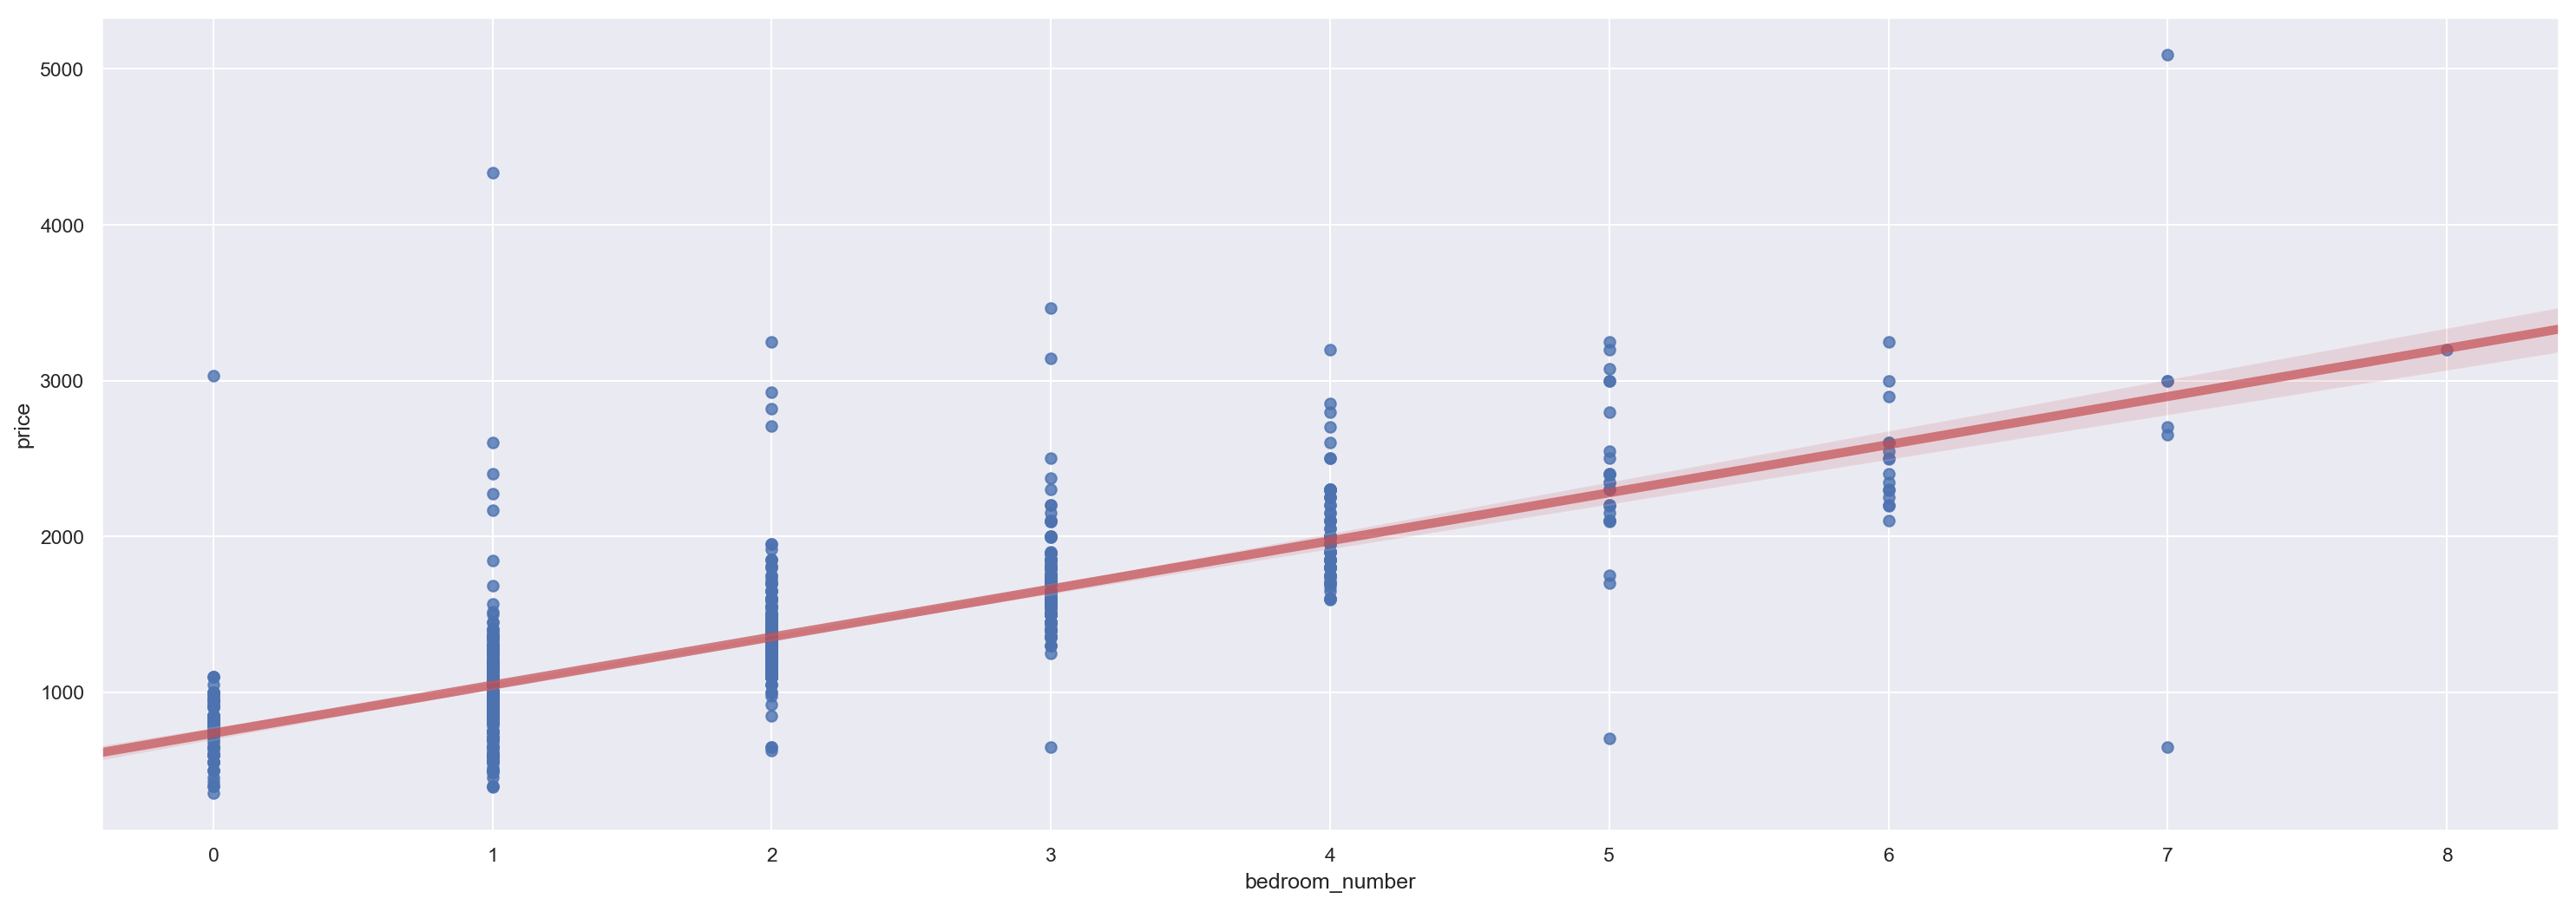

In [185]:


sns.regplot(x=rent["bedroom_number"], y=rent["price"], line_kws={"color":"r","alpha":0.7,"lw":5})



In [186]:


import sklearn
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from patsy import dmatrices, dmatrix, demo_data
from sklearn import preprocessing


frames = [rent_house, rent_flat]
result = pd.concat(frames)

#min_max_scaler = preprocessing.MinMaxScaler()
#np_scaled = min_max_scaler.fit_transform(result)
#df_normalized = pd.DataFrame(np_scaled)
#df_normalized


In [187]:

result = result[(result['property_type'] != 'Link-detached house') & (result['property_type'] != 'End terrace hous')]
y, X = dmatrices('price ~ property_type + post_code + bedroom_number + num_recepts + bathroom_number', data=result, return_type='dataframe')


mod = sm.OLS(y, X)  #Use the model class to describe the model
res = mod.fit() #Fit the model using a class method
res.summary()

result['property_type'].unique()


array(['Terraced house', 'End terrace house', 'Detached house',
       'Semi-detached house', 'Town house', 'Flat'], dtype=object)

In [188]:
X_train, X_test, Y_train, Y_test =  sklearn.model_selection.train_test_split(X, y, test_size = 0.33, random_state = 3)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(739, 15)
(365, 15)
(739, 1)
(365, 1)


Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

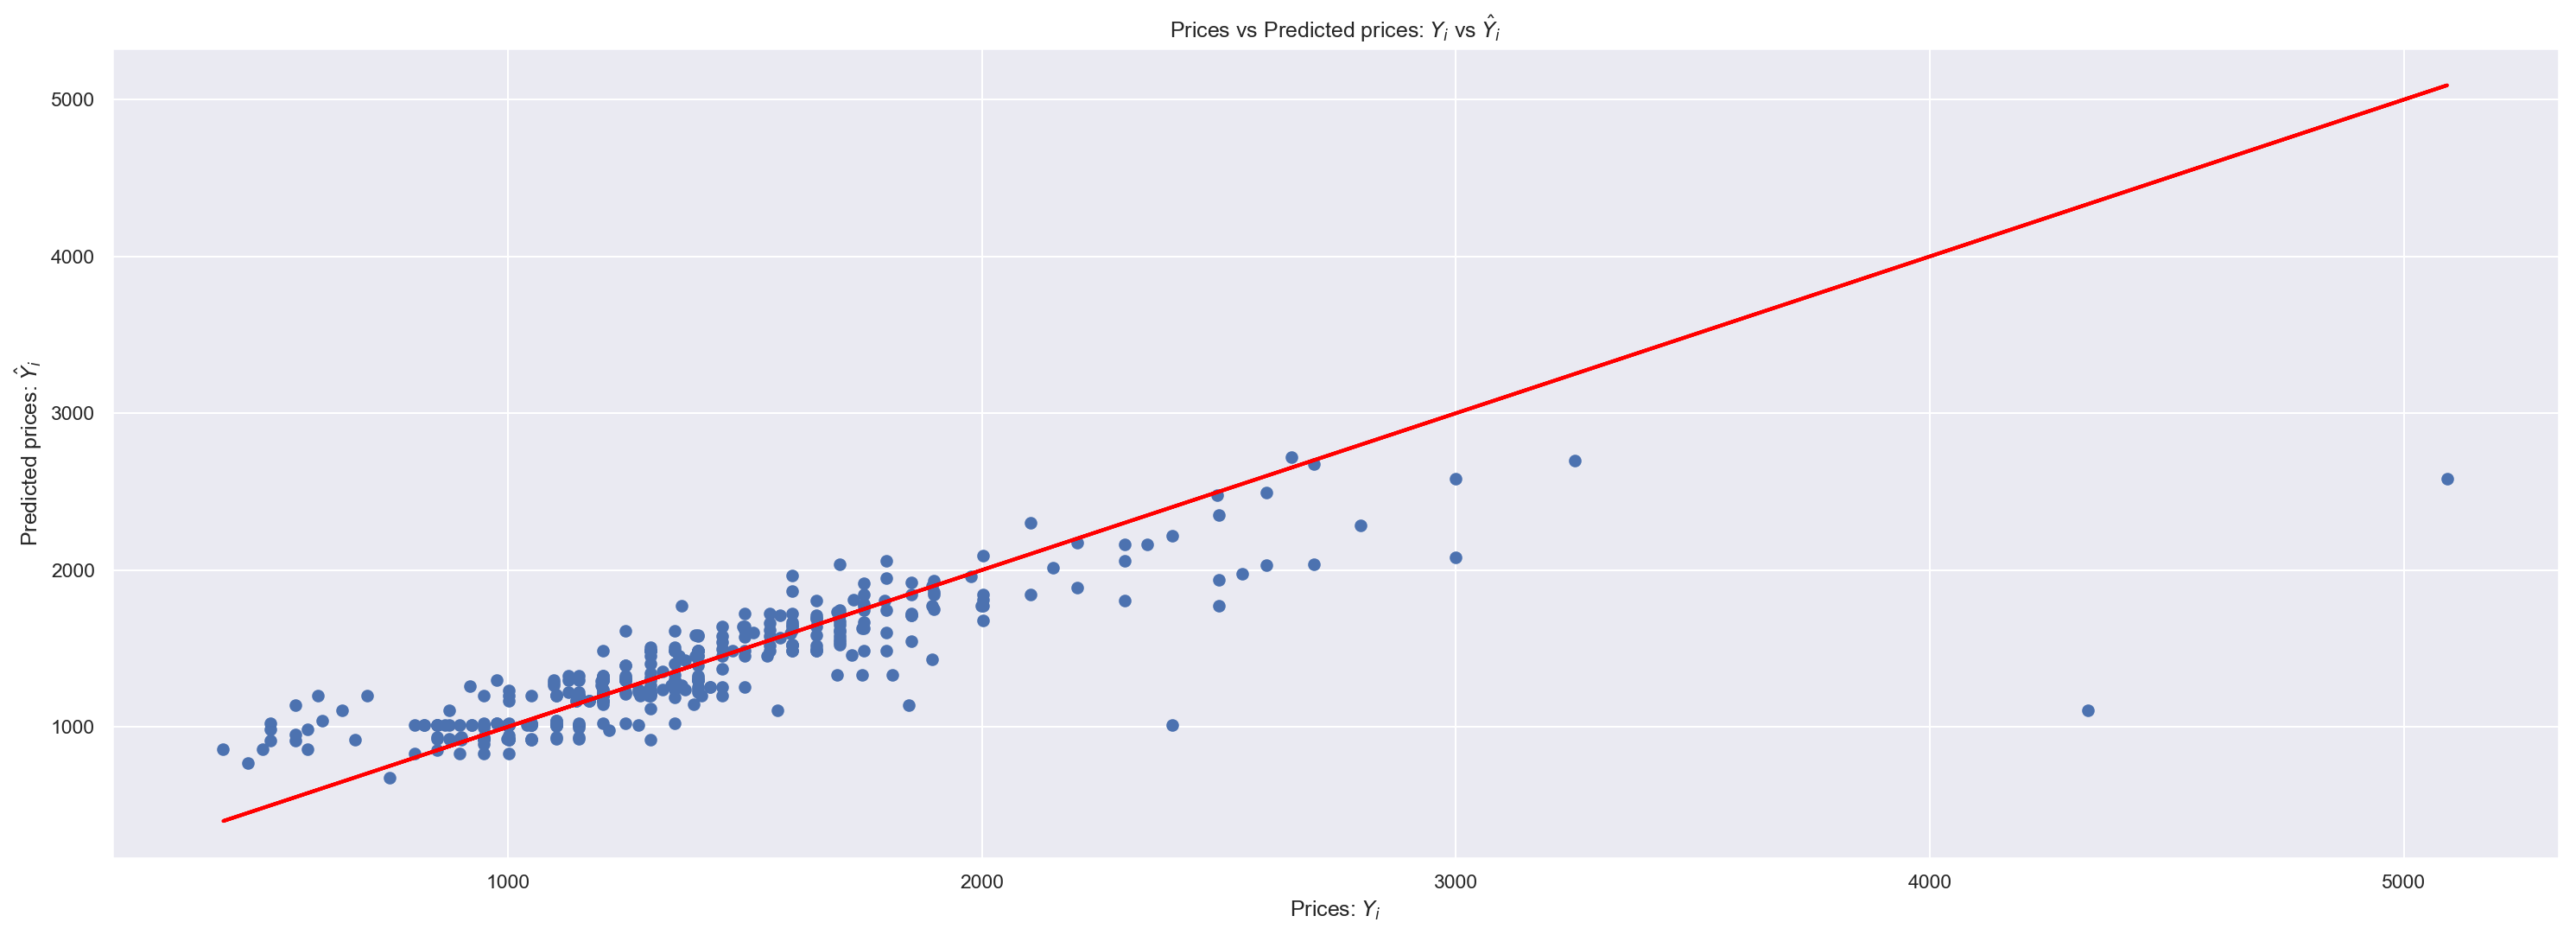

In [189]:

#Y_train,X_train= dmatrices("Y_train ~ X_train",df)
lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)
#plt.figure(figsize=(12,10)
plt.scatter(Y_test, Y_pred)

#plt.scatter(y_test, y_pred, color='blue')
plt.plot(Y_test, Y_test, color='red', linewidth=2)
#plt.plot(Y_test,  Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")


In [190]:
lm.score(X_test, Y_test)

0.6583570355234484

Coefficients: 
 [[   0.          -15.08634539 -106.80089786  -48.50499017  -76.98180337
   305.72326503 -188.40882028 -174.89381621 -279.17506254 -194.13596625
  -264.61433259 -163.53349198  287.37075537   92.90873505  -60.59860299]]
Variance score: 0.6583570355234484


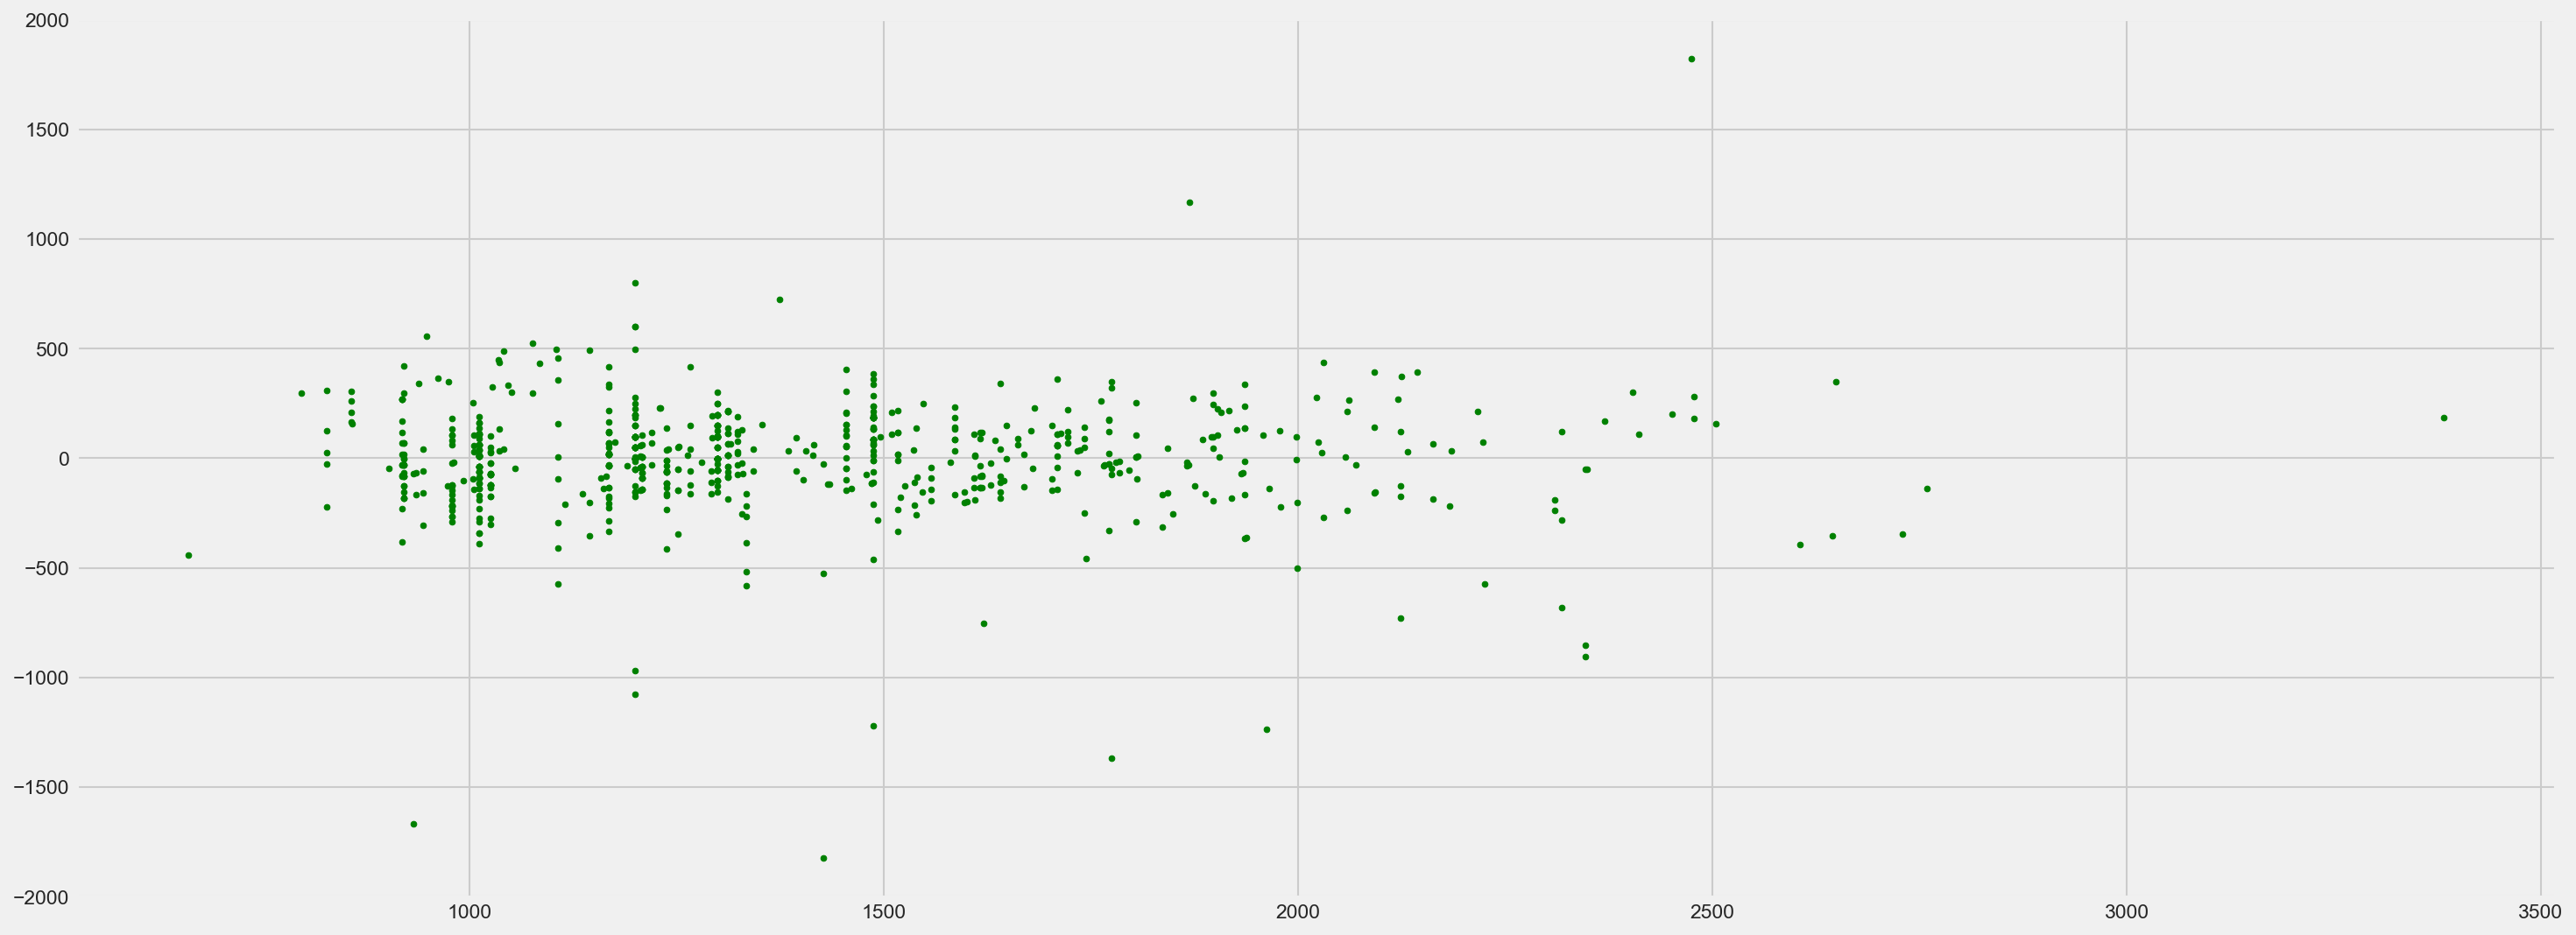

In [191]:
# regression coefficients 
print('Coefficients: \n', lm.coef_) 
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(lm.score(X_test, Y_test))) 

# plot for residual error 

## setting plot style 
plt.style.use('fivethirtyeight') 

## plotting residual errors in training data 
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, color = "green", s = 10, label = 'Train data')


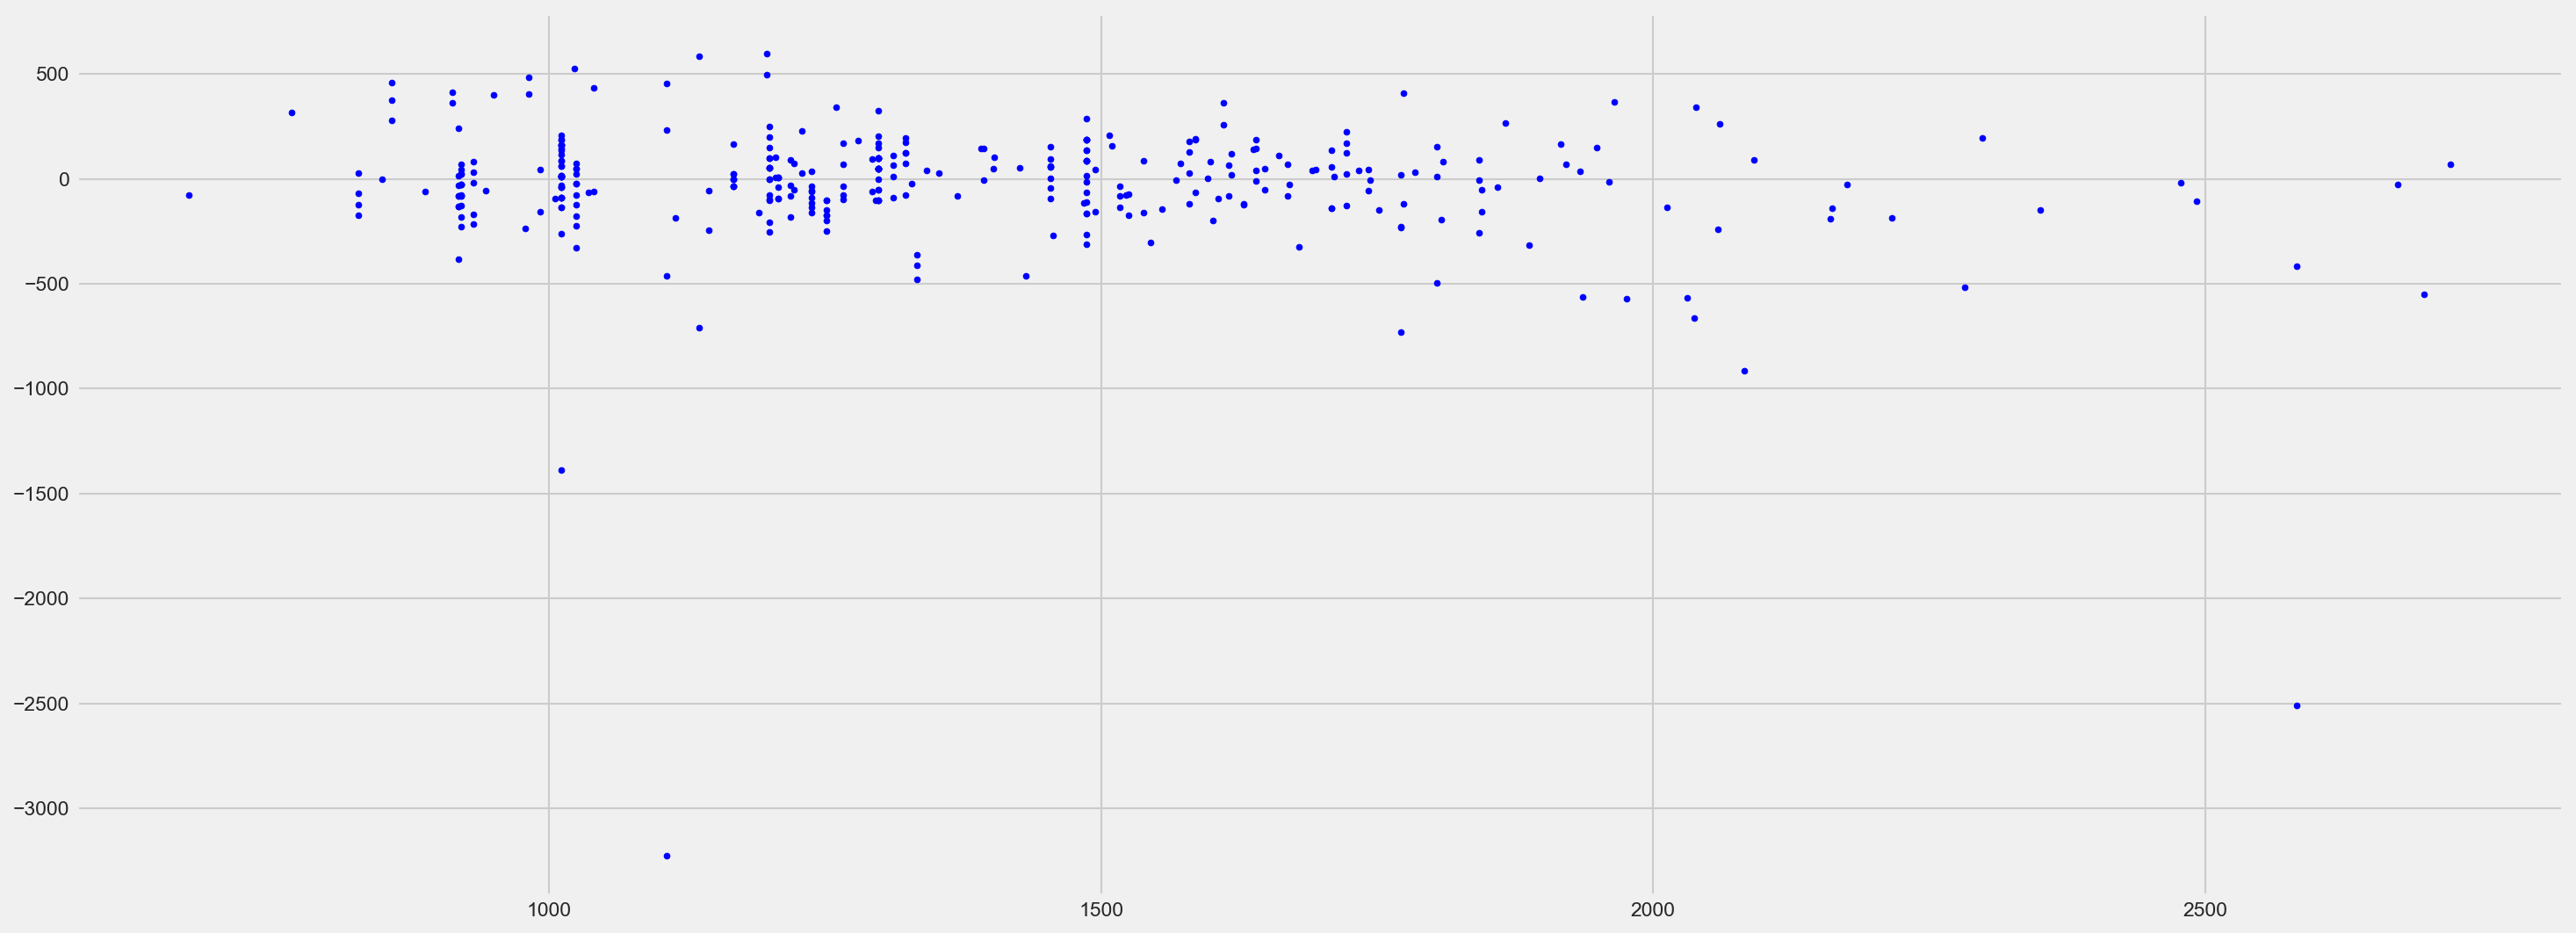

In [192]:
## plotting residual errors in test data 
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, 
            color = "blue", s = 10, label = 'Test data') 

In [193]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

90175.61693308978


In [194]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [195]:
clf.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [196]:
clf.fit(X_train, Y_train) 
y_pred=clf.predict(X_test) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [197]:
clf.score(X_test,Y_test)

0.6374982076637546

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

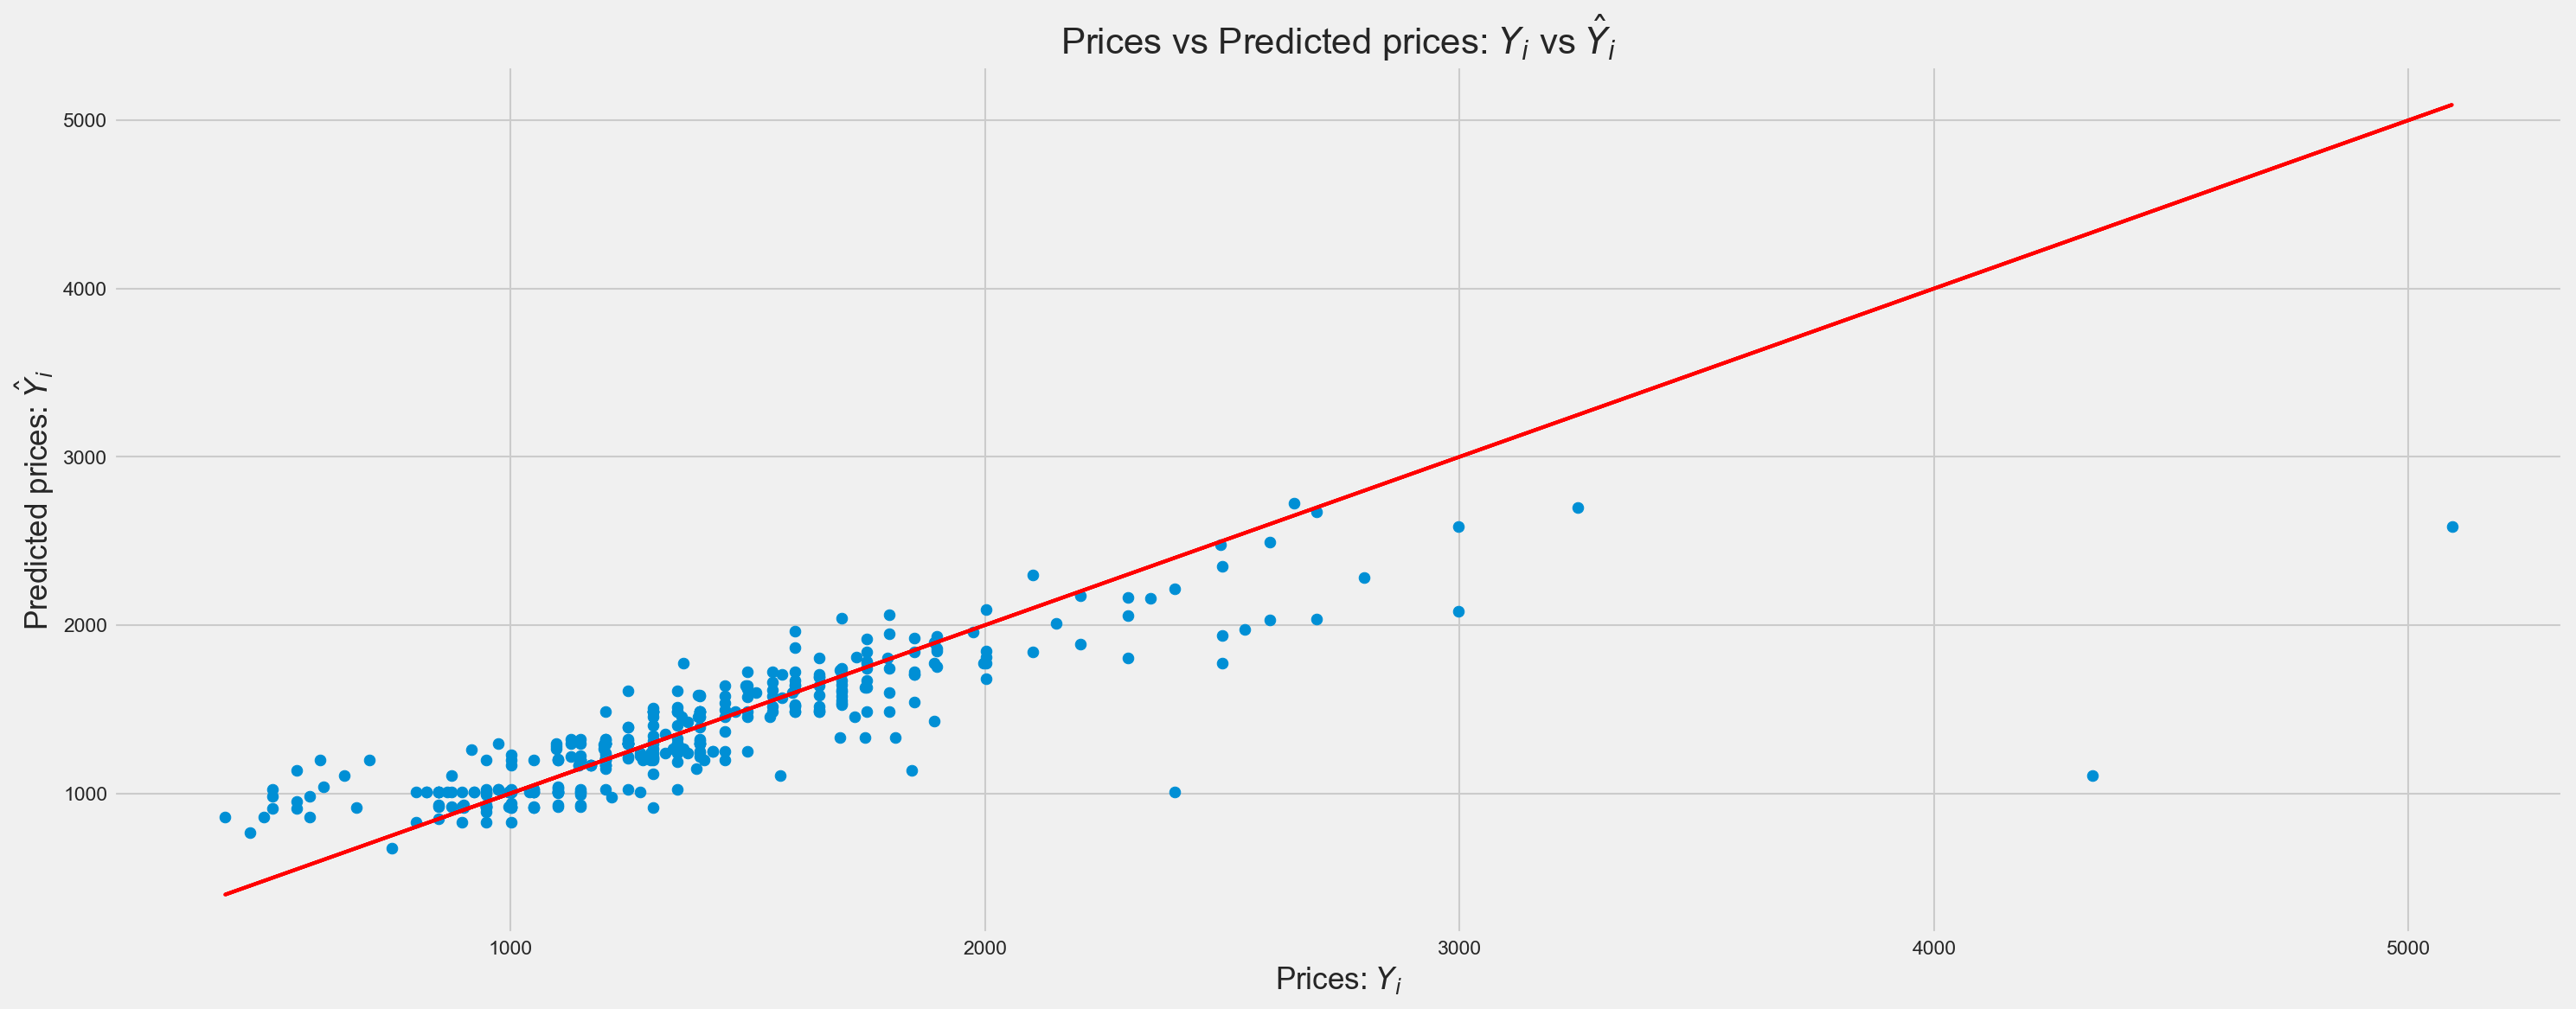

In [198]:
plt.scatter(Y_test, Y_pred)

#plt.scatter(y_test, y_pred, color='blue')
plt.plot(Y_test, Y_test, color='red', linewidth=2)
#plt.plot(Y_test,  Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [199]:
print (lm)
print (lm.coef_)
print (lm.intercept_)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[[   0.          -15.08634539 -106.80089786  -48.50499017  -76.98180337
   305.72326503 -188.40882028 -174.89381621 -279.17506254 -194.13596625
  -264.61433259 -163.53349198  287.37075537   92.90873505  -60.59860299]]
[986.60198201]
